In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor as RandomForest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
listing_data = pd.read_csv(filepath_or_buffer = 'listings.csv')

C:\Users\zhs07\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listing_data = listing_data[['accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 
                             'cancellation_policy', 'city', 'latitude', 'longitude', 'price', 'room_type']]
listing_data.dropna(inplace=True)

In [4]:
list_of_price = []
listing_data['price'] = (listing_data['price'].str)[1:]
for i in range(0,len(listing_data)):
    price = listing_data['price'].iloc[i]
    if ',' in price:
        price = price.replace(",", "")
    list_of_price.append(float(price))
listing_data['price'] = list_of_price

In [5]:
def one_hot(data):
    for col_name in data.columns:
        if(data[col_name].dtype == 'object'):
            one_hot = pd.get_dummies(data[col_name])
            data.drop([col_name], axis = 1, inplace = True)
            data = data.join(one_hot)
    return data

In [6]:
listing_data = one_hot(listing_data)

In [7]:
train,test = train_test_split(listing_data, test_size=0.2)
train_y = train['price']
train_x = train.drop('price',axis=1)
test_y = test['price']
test_x = test.drop('price',axis=1)

In [80]:
train

,accommodates,bathrooms,bedrooms,beds,latitude,longitude,price,Airbed,Couch,Futon,...,whittier,wilmington,windsor hills,winnetka,woodland hills,wrightwood,лос,Entire home/apt,Private room,Shared room
13751,4.0,2.0,3.0,4.0,34.111092,-117.786551,119.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20342,2.0,1.0,1.0,1.0,33.759089,-118.411562,115.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32538,2.0,1.0,1.0,1.0,37.795028,-122.269273,400.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
51578,2.0,1.0,1.0,1.0,47.663548,-122.285938,66.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23879,3.0,1.0,2.0,2.0,34.091613,-118.262000,120.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44309,2.0,1.0,1.0,1.0,37.762491,-122.505643,96.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3401,6.0,2.0,3.0,3.0,34.177022,-118.326096,289.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2846,3.0,1.0,1.0,1.0,34.161522,-118.395465,88.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19184,2.0,2.0,1.0,1.0,34.021261,-118.419261,165.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5420,3.0,1.0,0.0,3.0,34.102335,-118.325476,155.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
n_estimators_list = [50,100,150,200]
min_samples_split_list = [20,40,100,200]
best_forest = None
best_score = -float('Inf')
i = 0
for n_estimators in n_estimators_list:
    for min_sample_split in min_samples_split_list:
        print(i)
        i += 1
        new_forest = RandomForest(n_estimators = n_estimators, criterion = 'mse', min_samples_split = min_sample_split)
        new_forest.fit(train_x,train_y)
        new_score = new_forest.score(test_x,test_y)
        if new_score > best_score:
            best_score = new_score
            best_forest = new_forest

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [84]:
print(best_score)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.32946040155190803


In [85]:
best_forest.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
best_model = RandomForest( criterion = 'mse', 
                          min_samples_split = 20, 
                          max_features = 'auto', 
                          n_estimators = 200)

In [15]:
best_model.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
y_cap = best_model.predict(test_x)

In [25]:
sq_err = 0
for i in range(0,len(y_cap)):
    sq_err += (test_y.iloc[i] - y_cap[i])**2
mean_sq_err = sq_err/len(y_cap)
rmse = mean_sq_err**0.5
rmse

298.5728291729756

In [24]:
test_y.iloc[0]

61.0

In [20]:
test_y

54085     61.0
1623     125.0
47841    139.0
22208     51.0
9582      25.0
29994     69.0
44251    140.0
22761    125.0
7062     220.0
19421     65.0
6682      78.0
32525    120.0
46260    395.0
51100     90.0
48488    130.0
56044     75.0
35645    400.0
14358    140.0
35540    124.0
31844     89.0
52900    125.0
55164    121.0
26933    360.0
18213     60.0
2719      90.0
10465    100.0
8229      30.0
45476    175.0
7909      40.0
37449     68.0
         ...  
43022    150.0
39517     26.0
8691     199.0
23919     99.0
22541     33.0
626      300.0
39963    195.0
7023      70.0
52439     55.0
31300    124.0
43542    375.0
20948     80.0
47360    205.0
49283    130.0
12282    120.0
5547     175.0
36731    140.0
41594    295.0
30214     25.0
39987    135.0
27317    299.0
40791    499.0
47703     53.0
49340    140.0
29168     92.0
628       44.0
52970     87.0
28828     60.0
22388     90.0
15998    125.0
Name: price, Length: 11232, dtype: float64

In [93]:
best_forest.feature_importances_

array([4.81169352e-02, 3.55856273e-01, 1.46396476e-01, 2.65476125e-02,
       1.21031444e-01, 1.61276536e-01, 5.96690295e-04, 3.39346169e-04,
       2.69408579e-04, 6.50260965e-05, 8.92534885e-05, 8.91560979e-03,
       8.59883774e-04, 5.93376223e-07, 1.85350738e-03, 6.34026131e-05,
       6.24447833e-03, 1.40320028e-04, 1.68289655e-04, 6.59762448e-07,
       4.68070444e-06, 3.40759068e-05, 2.23387204e-05, 1.58138239e-04,
       3.60894226e-08, 3.11223566e-05, 1.18614972e-06, 1.24576056e-06,
       2.09376697e-09, 1.83421184e-07, 1.35299127e-08, 1.30682082e-05,
       6.47058194e-08, 1.00709298e-05, 7.27227450e-04, 1.26736728e-06,
       1.39175852e-02, 0.00000000e+00, 8.73139582e-08, 1.31805182e-04,
       7.17969712e-05, 7.83338796e-09, 0.00000000e+00, 2.90308682e-04,
       3.49959758e-04, 2.20641643e-08, 8.16218703e-05, 2.85525002e-06,
       2.34038004e-06, 5.18206496e-05, 9.62523931e-07, 2.79735977e-06,
       1.10359765e-08, 7.40687833e-06, 2.11570576e-08, 1.04612389e-06,
      

In [95]:
list(train)

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'latitude',
 'longitude',
 'price',
 'Airbed',
 'Couch',
 'Futon',
 'Pull-out Sofa',
 'Real Bed',
 'flexible',
 'moderate',
 'no_refunds',
 'strict',
 'super_strict_30',
 'super_strict_60',
 'acton',
 'agoura hills',
 'agua dulce',
 'alhambra',
 'alpine',
 'aptos',
 'arcadia',
 'artesia',
 'avalon',
 'azusa',
 'baldwin park',
 'ballard',
 'bel air',
 'bell',
 'bellflower',
 'belmont shore',
 'ben lomond',
 'berkeley',
 'bernal heights',
 'beverly hills',
 'bonita',
 'bonny doon',
 'boulder creek',
 'bradbury',
 'brookdale',
 'buena park',
 'burbank',
 'calabasas',
 'canoga park',
 'capitola',
 'carson',
 'castaic',
 'cerritos',
 'chatsworth',
 'chula vista',
 'city of commerce',
 'claremont',
 'commerce',
 'compton',
 'corralitos',
 'covina',
 'culver city',
 'cypress',
 'daly city',
 'davenport',
 'del aire',
 'del mar',
 'diamond bar',
 'downey',
 'duarte',
 'el monte',
 'el segundo',
 'emeryville',
 'encino',
 'escondido',
 'felt

In [96]:
feature_value = dict(zip(list(train),list(best_forest.feature_importances_)))

In [97]:
feature_value

{'accommodates': 0.04811693522844723,
 'bathrooms': 0.3558562725176837,
 'bedrooms': 0.14639647615004125,
 'beds': 0.02654761246492682,
 'latitude': 0.12103144393333329,
 'longitude': 0.16127653555802926,
 'price': 0.0005966902950967127,
 'Airbed': 0.0003393461689960204,
 'Couch': 0.00026940857917188814,
 'Futon': 6.502609646103352e-05,
 'Pull-out Sofa': 8.92534885262344e-05,
 'Real Bed': 0.008915609793960477,
 'flexible': 0.0008598837738845192,
 'moderate': 5.933762233069757e-07,
 'no_refunds': 0.0018535073811112388,
 'strict': 6.340261312607972e-05,
 'super_strict_30': 0.006244478330407421,
 'super_strict_60': 0.00014032002815295738,
 'acton': 0.00016828965532901302,
 'agoura hills': 6.597624481595078e-07,
 'agua dulce': 4.680704436347786e-06,
 'alhambra': 3.407590679379405e-05,
 'alpine': 2.2338720436659818e-05,
 'aptos': 0.00015813823949038162,
 'arcadia': 3.6089422576281826e-08,
 'artesia': 3.1122356642815043e-05,
 'avalon': 1.186149724445124e-06,
 'azusa': 1.245760557887285e-06,


In [98]:
original_train_list = ['accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 
                             'cancellation_policy', 'city', 'latitude', 'longitude', 'room_type']

In [108]:
'Shared room' in feature_value.keys()

False

In [110]:
for element in original_train_list:
    if element in feature_value.keys():
        print(str(element) + '     ' + str(feature_value[element]))
    else:
        element_list = listing_data[element].unique()
        sum_features = 0;
        for element_2 in element_list:
            if element_2 in feature_value.keys():
                sum_features += feature_value[element_2]
        print(str(element) + '     ' + str(sum_features))

accommodates     0.04811693522844723
bathrooms     0.3558562725176837
bed_type     0.009678644127115653
bedrooms     0.14639647615004125
beds     0.02654761246492682
cancellation_policy     0.009162185502905523
city     0.11563903349403999
latitude     0.12103144393333329
longitude     0.16127653555802926
room_type     0.0056981707283806455


In [26]:
list_1 = ['accommodates', 'bathrooms', 'bed_type', 'bedrooms', 'beds', 
                             'cancellation_policy', 'latitude', 'longitude', 'room_type']
list_2 = [0.0481,0.3558,0.00967,0.1464,0.0265,0.00916,0.1210,0.1612,0.0057]

In [33]:
temp_map = dict(zip(list_1,list_2))

In [35]:
key_list = sorted(temp_map, key=temp_map.get, reverse=True)

In [36]:
list_1 = key_list
list_2 = []
for key in key_list:
    list_2.append(temp_map[key])

<BarContainer object of 9 artists>

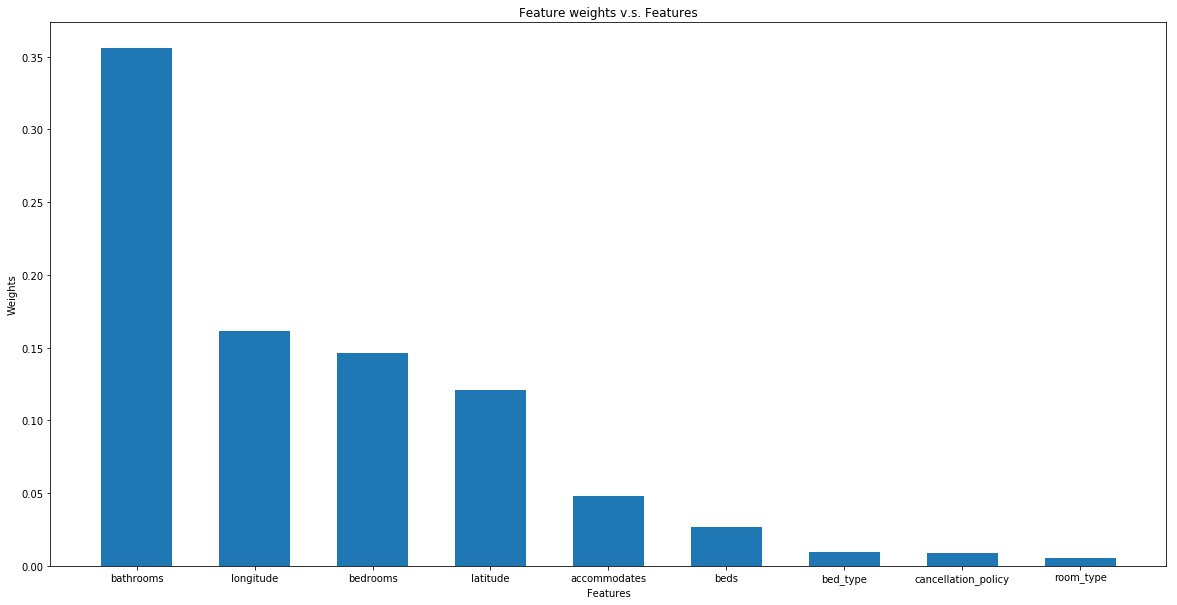

In [37]:
plt.figure(figsize=(20,10))
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature weights v.s. Features')
plt.bar(list_1,list_2, width = 0.6)